# Fourier methods for solvinge PDEs
In the problem set you looked the diffusion advection equation and how this can be solved by Fourier methods. You solved this for an initial condition of a point source of dye.

In the second part you looked at generalising this method and found that for a general initial condition the evolution can be expressed through convolutions. This workbook allows you to investigate some standard example numerically.

## Initialisation code

These few cells produce some functions for finding (to a good approximation) the various functions that we're interested in.  You don't need to understand the details of how any of this works, but feel free to ask.

**You need to run all the cells in this section for anything to work.**

In [1]:
%matplotlib inline
from matplotlib import pyplot
import matplotlib
import scipy.signal
import numpy as np
import ipywidgets

### Initial conditions

In [2]:
def top_hat(x, width, amplitude = 1, centre = 0):
  r"""
    Generate a top hat function 
    """
  th = np.zeros(x.shape)
  th[(x >= centre - width/2) & (x < centre + width/2)] = amplitude
  return th

def top_hat2D(x, y, width_x, width_y, centre = 0, amplitude = 1):
  return top_hat(x, width_x, amplitude, centre) * top_hat(y, width_y, amplitude, centre)

def approximateDiracDelta(x, amplitude = 1, centre = 0):
  r"""
    Generate a narrow top hat to approximate a delta
    """
  return top_hat(x, 1, amplitude, centre)

def approximateDiracDelta2D(x, y, amplitude = 1, centre = 0):
  r"""
    Generate a narrow top hat to approximate a delta
    """
  return top_hat2D(x, y, 1, 1, centre, amplitude)

def gauss_function(x, a, x0, sigma):
  r"""
    Generate a narrow top hat to approximate a delta
    """
  return a / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x-x0)**2/(2*sigma**2))

def gauss_function2D(x,y,a,x0,y0,sigma_x, sigma_y):
  z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((x-x0)**2/(2*sigma_x**2)
     + (y-y0)**2/(2*sigma_y**2))))
  return z


### Diffusion equations

In [3]:
def diffusion1D(x, D, t = 0, x0 = 0, a = 1):
  r'''
  returns a Gaussian this is to be convolved with the initial condition
  '''
  #if t == 0: # treat time point one as a delta
  #  g = approximateDiracDelta(x)
  #else:
  sigma = np.sqrt(2 * D * t)
  g = gauss_function(x, a, x0, sigma)
  return g

def diffusion2D(x, y, Dx, Dy, t = 0, x0 = 0, y0= 0, a = 1):
  r'''
  returns a Gaussian this is to be convolved with the initial condition
  '''
  #if t == 0: # treat time point one as a delta
  #  g = approximateDiracDelta2D(x, y, amplitude = 1, centre = 0)
  #else:
  sigma_x = np.sqrt(2 * Dx * t)
  sigma_y = np.sqrt(2 * Dy * t)
  g = gauss_function2D(x,y,a,x0,y0,sigma_x, sigma_y)
  return g

def getDiffusionAsFunctionOfTime(xs, ts, n0, g, D, c = 0):
  gs = g(xs, D, ts, x0 = c * ts, a = 1)
  diffusion = np.apply_along_axis(lambda m: np.convolve(m, n0, mode='same'), axis=1, arr=gs)
  return diffusion



In [23]:
def diffusionplot(xs, n0, g, t, D = 10, x0 = 0):
    r"""
    Plot a function ``f`` and its Legendre-, Taylor- and Fourier-series
    approximations of the given order on the interval ..math:`[-1, 1)`.
    """
    cm = matplotlib.cm.viridis
    _, axes = pyplot.subplots()
    gs = g(xs, D, t, x0 = x0)  # np.array([for x in xs])
    diffusion = np.convolve(gs, n0, mode = 'same')
    axes.plot(xs, diffusion, label="n(x,t)", linewidth=2)
    axes.plot(xs, gs, label="g(x,t)", linewidth=2, dashes=(5, 5))
    axes.plot(xs, n0, label="n_0(x)", linewidth=2, dashes=(5, 5))
    axes.set_xlim((xs[0] - 0.03*(xs[-1]-xs[0]), xs[-1] + 0.03*(xs[-1]-xs[0])))
    axes.set_xlabel('x')
    axes.set_ylabel('n(x,t)')
    mn, mx = np.min(n0), np.max(n0)
    axes.legend()

def diffusionplot2D(xs, ys, n0, g, t, Dx = 10, Dy = 1, x0 = 0, y0= 0):
  r"""
  Plot a function ``f`` and its Legendre-, Taylor- and Fourier-series
  approximations of the given order on the interval ..math:`[-1, 1)`.
  """
  cm = matplotlib.cm.viridis
  _, axes = pyplot.subplots(figsize = [10,10])
  gs = g(xs, ys, Dx, Dy, t, x0 = x0, y0= y0)  # np.array([for x in xs])
  diffusion = scipy.signal.convolve2d(gs, n0, mode = 'same')
  axes.contourf(xs, ys, diffusion, cmap='Blues')
  axes.set_xlabel('x')
  axes.set_ylabel('y')

def diffusionPlotTime(x,xs,ts,diffusion):
  _, axes = pyplot.subplots()
  axes.plot(ts[xs==x], diffusion[xs==x])
  mn, mx = np.min(diffusion), np.max(diffusion)
  axes.set_ylim((mn - 0.1*(mx-mn), mx + 0.1*(mx-mn)))
  axes.set_xlabel('t')
  axes.set_ylabel('n(x,t)')

def diffusionPlotX(t,xs,ts,diffusion):
  _, axes = pyplot.subplots()
  axes.plot(xs[ts==t], diffusion[ts==t])
  mn, mx = np.min(diffusion), np.max(diffusion)
  axes.set_ylim((mn - 0.1*(mx-mn), mx + 0.1*(mx-mn)))
  axes.set_xlabel('x')
  axes.set_ylabel('n(x,t)')

# Investigating diffusion with different initial conditions

## Infinitely small point (delta function)

In [5]:
x = np.linspace(-30, 30, 101)

ipywidgets.interact(
    lambda t: diffusionplot(x, approximateDiracDelta(x), diffusion1D, t, D = 0.1, x0 = 0),
    t=ipywidgets.IntSlider(min=1, max=50, step=1, value=0),
);

interactive(children=(IntSlider(value=1, description='t', max=50, min=1), Output()), _dom_classes=('widget-int…

## Top hat function

In [6]:
x = np.linspace(-50, 50, 101)

ipywidgets.interact(
    lambda t: diffusionplot(x, top_hat(x, 10, 1), diffusion1D, t, D = 0.1),
    t=ipywidgets.IntSlider(min=1, max=50, step=1, value=0),
);

interactive(children=(IntSlider(value=1, description='t', max=50, min=1), Output()), _dom_classes=('widget-int…

## Two points next to one another

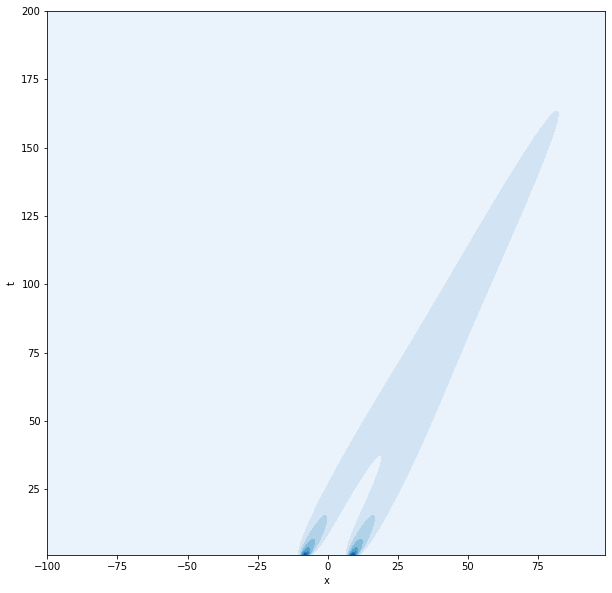

interactive(children=(IntSlider(value=100, description='t', max=200, min=1), Output()), _dom_classes=('widget-…

In [24]:
#x = np.linspace(-30, 30, 101)

#ipywidgets.interact(
#    lambda t: diffusionplot(x, approximateDiracDelta(x, centre = -5) + approximateDiracDelta(x, centre = 5, amplitude = 1), diffusion1D, t, D = 0.2),
#    t=ipywidgets.IntSlider(min=1, max=50, step=1, value=0),
#);

width = 10
size = 300
D = 0.5
c = 0.5

xs = np.arange(-100, 100)
n0 = approximateDiracDelta(x, centre = -5) + approximateDiracDelta(x, centre = 5, amplitude = 1)
ts = np.arange(1, 201)
xs, ts = np.meshgrid(xs, ts)
diffusionTH = getDiffusionAsFunctionOfTime(xs, ts, n0, diffusion1D, D, c)


_, axes = pyplot.subplots(figsize = [10,10])
axes.contourf(xs, ts, diffusionTH, cmap='Blues')
axes.set_xlabel('x')
axes.set_ylabel('t')

ipywidgets.interact(
    lambda t: diffusionPlotX(t,xs,ts,diffusionTH),
    t=(np.min(ts), np.max(ts), 1),
);

# Diffusion advection
The above methods can be applied in the diffusion advection problem from the problem sheet. Below are examples of n(x,t)  

## Spatial profile at different times
### Diffusion from a point

In [8]:
xtime = np.linspace(-30, 30, 101)
c = 0.2

ipywidgets.interact(
    lambda t: diffusionplot(xtime, approximateDiracDelta(xtime), diffusion1D, t, D = 0.1, x0 = c * t),
    t=ipywidgets.IntSlider(min=1, max=50, step=1, value=0),
);

interactive(children=(IntSlider(value=1, description='t', max=50, min=1), Output()), _dom_classes=('widget-int…

# Other examples (not covered in the problem sheet)

## Temporal profile at different positions
In some cases it is more interesting to consider the diffusion through a particular point as a function of time. Below are some visualisations related to this.
### Diffusion from a point

In [9]:
width = 10
size = 300
D = 1
c = 0.5

xs = np.arange(-100, 100)
n0 = approximateDiracDelta(xs)
ts = np.arange(1, 201)
xs, ts = np.meshgrid(xs, ts)
diffusionDD = getDiffusionAsFunctionOfTime(xs, ts, n0, diffusion1D, D, c)


ipywidgets.interact(
    lambda x: diffusionPlotTime(x,xs,ts,diffusionDD),
    x=(np.min(xs), np.max(xs), 1),
);

interactive(children=(IntSlider(value=-1, description='x', max=99, min=-100), Output()), _dom_classes=('widget…

### Diffusion from neighbouring top hats

Text(0, 0.5, 't')

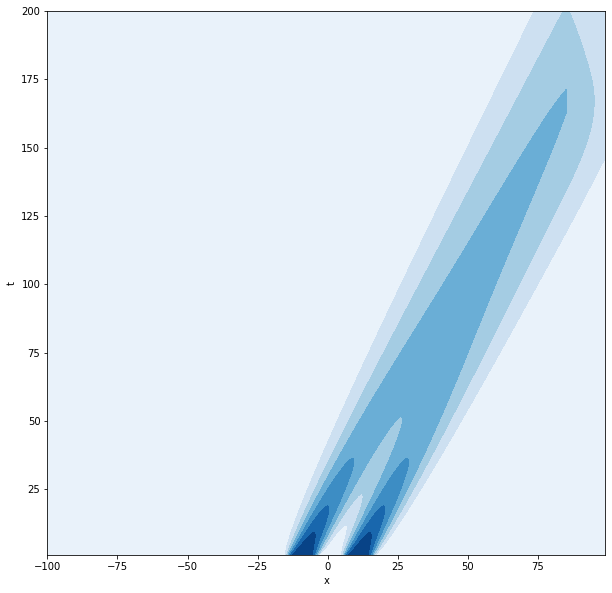

In [17]:
width = 10
size = 300
D = 0.5
c = 0.5

xs = np.arange(-100, 100)
n0 = top_hat(xs, width, amplitude = 1, centre = -10) +  top_hat(xs, width, amplitude = 1, centre = +10)
ts = np.arange(1, 201)
xs, ts = np.meshgrid(xs, ts)
diffusionTH = getDiffusionAsFunctionOfTime(xs, ts, n0, diffusion1D, D, c)


_, axes = pyplot.subplots(figsize = [10,10])
axes.contourf(xs, ts, diffusionTH, cmap='Blues')
axes.set_xlabel('x')
axes.set_ylabel('t')


In [16]:
ipywidgets.interact(
    lambda x: diffusionPlotTime(x,xs,ts,diffusionTH),
    x=(np.min(xs), np.max(xs), 1),
);

interactive(children=(IntSlider(value=-1, description='x', max=99, min=-100), Output()), _dom_classes=('widget…

# Diffusion in 2D with different coefficients
All of the examples covered in this problem sheet have been in 1D.

In [12]:
size = 101
x2D = np.linspace(-50, 50, size)
y2D = np.linspace(-50, 50, size)
x2D, y2D = np.meshgrid(x2D, y2D)

width_x = 10
width_y = 1

D_x = 2
D_y = 5

ipywidgets.interact(
    lambda t, D_x, D_y: diffusionplot2D(x2D,y2D, top_hat2D(x2D, y2D, width_x, width_y), diffusion2D, t, D_x, D_y),
    t=ipywidgets.IntSlider(min=1, max=50, step=1, value=0),
    D_x=(0.1, 5, 0.1),
    D_y=(0.1, 5, 0.1),
);

interactive(children=(IntSlider(value=1, description='t', max=50, min=1), FloatSlider(value=2.5000000000000004…

In [14]:
import numpy as np
from skimage import io

snowflake = io.imread('https://github.com/ncurry208/2020_21_DEEMseminars/blob/master/snowflakeMask.tif?raw=true')
xsnowflake = np.arange(snowflake.shape[0])
ysnowflake = np.arange(snowflake.shape[1])
xsnowflake, ysnowflake = np.meshgrid(xsnowflake, ysnowflake)

ipywidgets.interact(
    lambda t, D_x, D_y: diffusionplot2D(xsnowflake,ysnowflake, snowflake, diffusion2D, t, D_x, D_y, x0 = snowflake.shape[0]/2, y0 = snowflake.shape[1]/2),
    t=ipywidgets.IntSlider(min=1, max=50, step=1, value=0),
    D_x=(0.01, 0.5, 0.01),
    D_y=(0.01, 0.5, 0.01),
);

interactive(children=(IntSlider(value=1, description='t', max=50, min=1), FloatSlider(value=0.25, description=…